# **1. Perkenalan Dataset**


Dataset yang digunakan adalah Student Performance Dataset
Dataset ini berisi data akademik dan perilaku siswa yang digunakan untuk menganalisis
dan memprediksi performa akademik siswa.

Dataset mencakup berbagai fitur seperti:
- Tingkat kehadiran siswa
- Jam belajar mingguan
- Nilai sebelumnya
- Aktivitas ekstrakurikuler
- Dukungan orang tua
- Data kategorikal dan biner

Sumber / Link : https://www.kaggle.com/datasets/haseebindata/student-performance-predictions 



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use("seaborn-v0_8")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../student_raw/student_performance_updated_1000.csv")
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [4]:
df.shape

(1000, 12)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


Berdasarkan hasil statistik deskriptif
- StudyHoursPerWeek nilai rata-ratanya sekitar 17 jam per minggu, dengan variasi yang cukup besar antar siswa.
- Kolom Study Hours terdaoat nilai minimum -5, yang secara logika tidak mungkin maka dari it menandakan data tidak valid
- Kolom Attendance(%) nilai maksimumnya hingga 200%,nilai tidak realistis perlu ditangani pada tahap preprocessing.
- Nilai FinalGrade  berada pada rentang 62–92 rata-rata sekitar 80, cukupeimbang untuk digunakan sebagai target prediksi.

In [6]:
df.isnull().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

- StudentID (40 nilai kosong)
- Name (34 nilai kosong)
- Gender (48 nilai kosong)
- StudyHoursPerWeek (50 nilai kosong)
- AttendanceRate dan Attendance (%) juga memiliki missing value

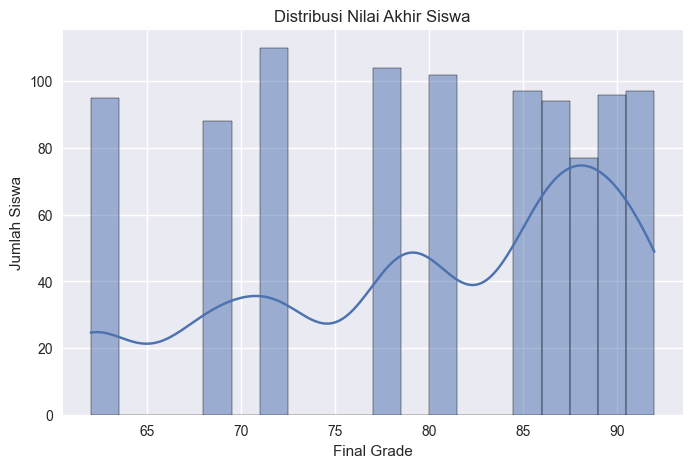

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["FinalGrade"], bins=20, kde=True)
plt.title("Distribusi Nilai Akhir Siswa")
plt.xlabel("Final Grade")
plt.ylabel("Jumlah Siswa")
plt.show()

Data pada FinalGrade sebagian besar siswa nilai akhirnya ada  pada rentang 75 hingga 90. Distribusi nilai
mengumpul pada nilai menengah ke atas, sedikit siswa berada pada nilai sangat rendah.

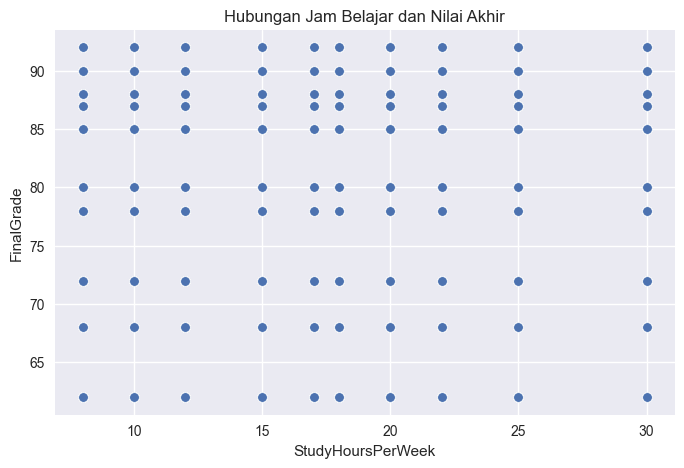

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="StudyHoursPerWeek",
    y="FinalGrade",
    data=df
)
plt.title("Hubungan Jam Belajar dan Nilai Akhir")
plt.show()


Berdasarkan visualisasi diatast antara StudyHoursPerWeek dan juga FinalGrade, adan kecenderungan hubungan positif antara jam belajar mingguan dan nilai akhir siswa. Siswa dengan jam belajar yang lebih tinggi umumnya memiliki nilai akhir yang
lebih baik

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "bool"]).columns

# mengisi issing values numerik dengan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# mengisi missing kategorikal dengan modus
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()


C:\Users\M Fauzan Lubada\AppData\Local\Temp\ipykernel_33876\3462407224.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study Hours                  0
Attendance (%)               0
Online Classes Taken         0
dtype: int64

In [10]:
# Memperbaiki nilai yang tidak masuk akal tadi (-5)
df["Study Hours"] = df["Study Hours"].clip(lower=0, upper=10)

# persentase kehadiran diperbaiki dengan batas wajar 0 - 100
df["Attendance (%)"] = df["Attendance (%)"].clip(lower=0, upper=100)

df[["Study Hours", "Attendance (%)"]].describe()

,Study Hours,Attendance (%)
count,1000.000000,1000.000000
mean,2.459200,76.197000
std,1.438222,14.506641
min,0.000000,50.000000
25%,1.200000,64.000000
50%,2.500000,76.000000
75%,3.700000,89.000000
max,5.000000,100.000000


In [11]:
# Merubah data kategorikal dengan encoding
label = LabelEncoder()
df["Gender"] = label.fit_transform(df["Gender"])
df["ParentalSupport"] = label.fit_transform(df["ParentalSupport"])
df["Online Classes Taken"] = label.fit_transform(df["Online Classes Taken"])
df.head()


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,1,85.0,15.0,78.0,1.0,0,80.0,4.8,59.0,0
1,2.0,Sarah,0,90.0,20.0,85.0,2.0,2,87.0,2.2,70.0,1
2,3.0,Alex,1,78.0,10.0,65.0,0.0,1,68.0,4.6,92.0,0
3,4.0,Michael,1,92.0,25.0,90.0,3.0,0,92.0,2.9,96.0,0
4,5.0,Emma,0,88.0,18.0,82.0,2.0,2,85.0,4.1,97.0,1


In [12]:
# Menghapus column yang memang tidak relevan untuk digunakan 
df = df.drop(columns=["StudentID", "Name"])
df.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0,80.0,4.8,59.0,0
1,0,90.0,20.0,85.0,2.0,2,87.0,2.2,70.0,1
2,1,78.0,10.0,65.0,0.0,1,68.0,4.6,92.0,0
3,1,92.0,25.0,90.0,3.0,0,92.0,2.9,96.0,0
4,0,88.0,18.0,82.0,2.0,2,85.0,4.1,97.0,1


In [13]:
output = "student_performance_preprocessing"
os.makedirs(output, exist_ok=True)
df.to_csv(
    os.path.join(output, "student_performance_clean.csv"),
    index=False
)
print("Berhasil!!!!!!")

Berhasil!!!!!!


In [14]:
dfcek = pd.read_csv("student_performance_preprocessing/student_performance_clean.csv")
dfcek.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0,80.0,4.8,59.0,0
1,0,90.0,20.0,85.0,2.0,2,87.0,2.2,70.0,1
2,1,78.0,10.0,65.0,0.0,1,68.0,4.6,92.0,0
3,1,92.0,25.0,90.0,3.0,0,92.0,2.9,96.0,0
4,0,88.0,18.0,82.0,2.0,2,85.0,4.1,97.0,1
